## 39 - Line detection using Houghline

Working of Houghline method:

First it creates a 2D array or accumulator (to hold values of two parameters) and it is set to zero initially.

Let rows denote the r and columns denote the (?)theta.

Size of array depends on the accuracy you need. Suppose you want the accuracy of angles to be 1 degree, you need 180 columns(Maximum degree for a straight line is 180).

For r, the maximum distance possible is the diagonal length of the image. So taking one pixel accuracy, number of rows can be diagonal length of the image.

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

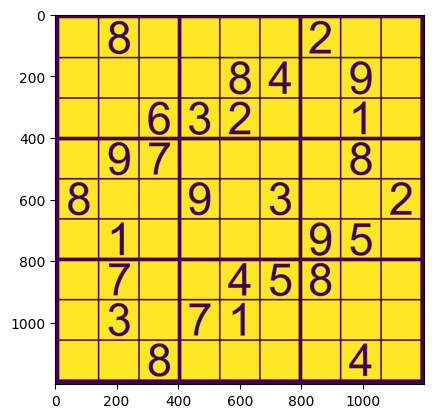

In [36]:
image = cv2.imread("/Users/alireza/Coding/OpenCV_Learning/OpenCV_Learnings/Images/sudoku.png",0)
plt.imshow(image)

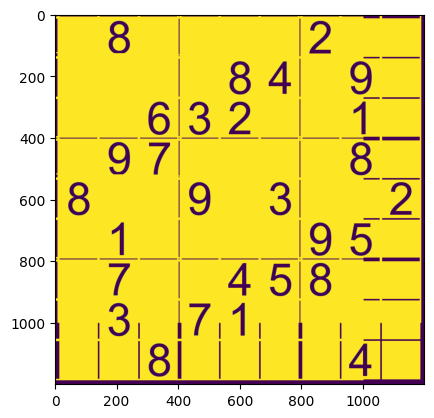

In [39]:

edges = cv2.Canny(image, 10, 250, apertureSize=3)

# This returns an array of r and theta values
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr
    # Stores the value of cos(theta) in a
    a = np.cos(theta)

    # Stores the value of sin(theta) in b
    b = np.sin(theta)

    # x0 stores the value rcos(theta)
    x0 = a*r

    # y0 stores the value rsin(theta)
    y0 = b*r

    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
    x1 = int(x0 + 1000*(-b))

    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
    y1 = int(y0 + 1000*(a))

    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
    x2 = int(x0 - 1000*(-b))

    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
    y2 = int(y0 - 1000*(a))

    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
    # (0,0,255) denotes the colour of the line to be
    # drawn. In this case, it is red.
    cv2.line(image, (x1, y1), (x2, y2), (256, 0, 0), 2)

plt.imshow(image)